<a href="https://colab.research.google.com/github/saishmudliyar/DS-Experiment/blob/main/Experiment_7%268_Saish_Mudliyar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 7 & 8





Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Information gain


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Load a dataset (e.g., iris dataset)
data = load_iris()
X, y = data.data, data.target

# Create and fit a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Get feature importances
print("Feature importances:", clf.feature_importances_)


Feature importances: [0.0115876  0.0115876  0.06606582 0.91075898]


Chi square

In [18]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

X, y = data.data, data.target

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

chi2_selector = SelectKBest(chi2, k=2)
X_new = chi2_selector.fit_transform(X, y)

print("Selected features based on Chi-Square test:", chi2_selector.get_support())

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)

print("Model accuracy:", clf.score(X_test, y_test))


Selected features based on Chi-Square test: [False False  True  True]
Model accuracy: 1.0


Pearson coefficient

In [19]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = data.data, data.target

# Calculate Pearson correlation coefficient between pairs of features
for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        corr, _ = pearsonr(X[:, i], X[:, j])
        print(f"Pearson correlation between feature {i} and feature {j}: {corr}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = GaussianNB()
clf.fit(X_train, y_train)

print("Model accuracy:", clf.score(X_test, y_test))


Pearson correlation between feature 0 and feature 1: -0.11756978413300206
Pearson correlation between feature 0 and feature 2: 0.8717537758865831
Pearson correlation between feature 0 and feature 3: 0.8179411262715756
Pearson correlation between feature 1 and feature 2: -0.4284401043305397
Pearson correlation between feature 1 and feature 3: -0.36612593253643905
Pearson correlation between feature 2 and feature 3: 0.962865431402796
Model accuracy: 0.9777777777777777


correlation matrix

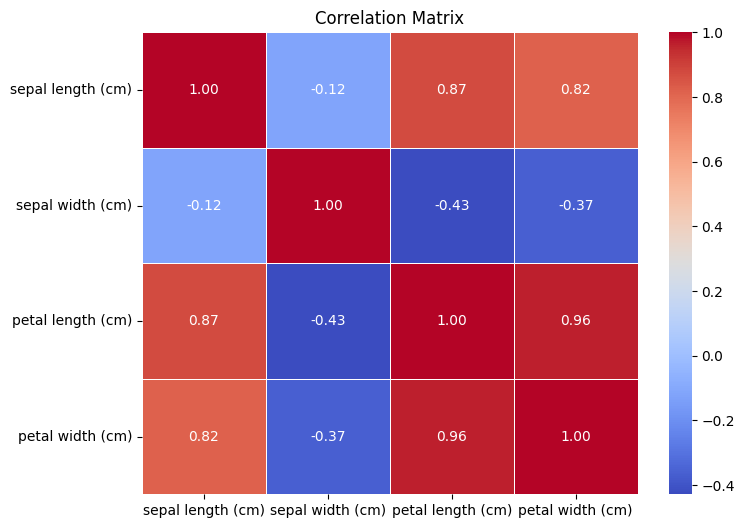

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X, y = data.data, data.target

# Create a DataFrame for features
df = pd.DataFrame(X, columns=data.feature_names)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
